In [1]:
pip install kaggle

In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkhipovg","key":"22b87d7710df7cd3182cc9477a99b39d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olgabelitskaya/flower-color-images

 88% 44.0M/50.1M [00:01<00:00, 46.3MB/s]
100% 50.1M/50.1M [00:01<00:00, 46.7MB/s]


In [5]:
!unzip flower-color-images.zip

Archive:  flower-color-images.zip
  inflating: FlowerColorImages.h5    
  inflating: flower_images/flower_images/0001.png  
  inflating: flower_images/flower_images/0002.png  
  inflating: flower_images/flower_images/0003.png  
  inflating: flower_images/flower_images/0004.png  
  inflating: flower_images/flower_images/0005.png  
  inflating: flower_images/flower_images/0006.png  
  inflating: flower_images/flower_images/0007.png  
  inflating: flower_images/flower_images/0008.png  
  inflating: flower_images/flower_images/0009.png  
  inflating: flower_images/flower_images/0010.png  
  inflating: flower_images/flower_images/0011.png  
  inflating: flower_images/flower_images/0012.png  
  inflating: flower_images/flower_images/0013.png  
  inflating: flower_images/flower_images/0014.png  
  inflating: flower_images/flower_images/0015.png  
  inflating: flower_images/flower_images/0016.png  
  inflating: flower_images/flower_images/0017.png  
  inflating: flower_images/flower_images/001

In [7]:
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import os

In [10]:
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
  return rotate(image, 30, reshape=False, mode='nearest')

In [9]:
def vertical_flip(image):
  return rotate(image, 180, reshape=False, mode='nearest')

In [11]:
import cv2

def flip_image(image, mode='horizontal'):

    if mode == 'horizontal':
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")

    return flipped_image


In [12]:
from PIL import ImageEnhance, Image
import numpy as np

def adjust_contrast(image):
   pil_img = Image.fromarray((image * 255).astype(np.uint8))
   contrast = ImageEnhance.Contrast(pil_img)
   pil_img_enhanced = contrast.enhance(2.0)

   return np.array(pil_img_enhanced) / 255.0

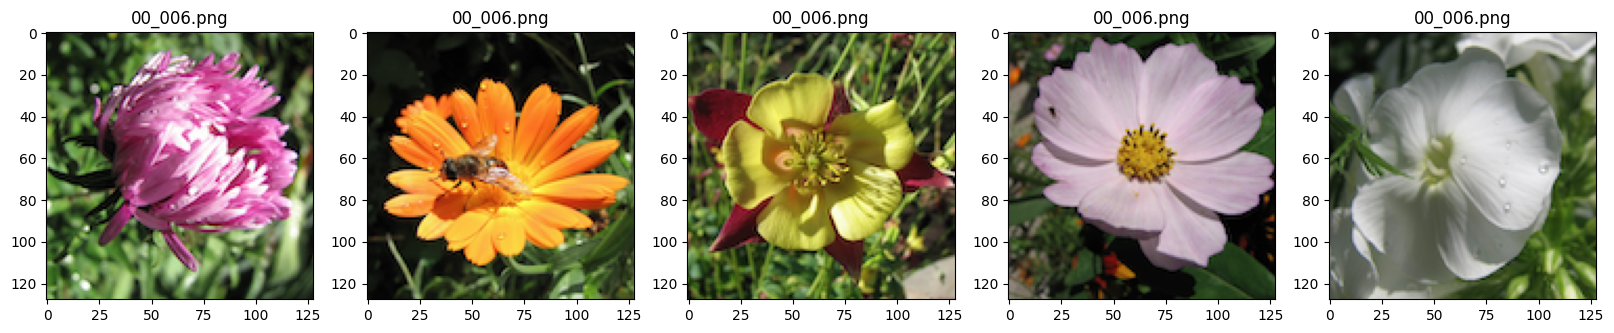

In [13]:
list_img = []
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('flowers/flowers'))
    image_path= os.path.join('flowers/flowers', file)
    img=mpimg.imread(image_path)
    list_img.append(img)

for i, img in enumerate(list_img):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

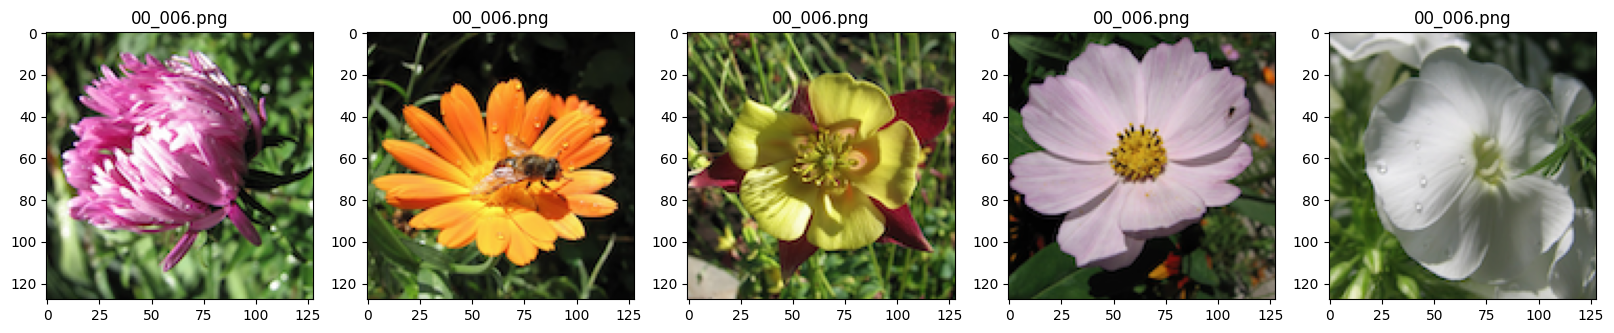

In [14]:
horizontal_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  horizontal_flip_list.append(flip_image(img, mode='horizontal'))

for i, img in enumerate(horizontal_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

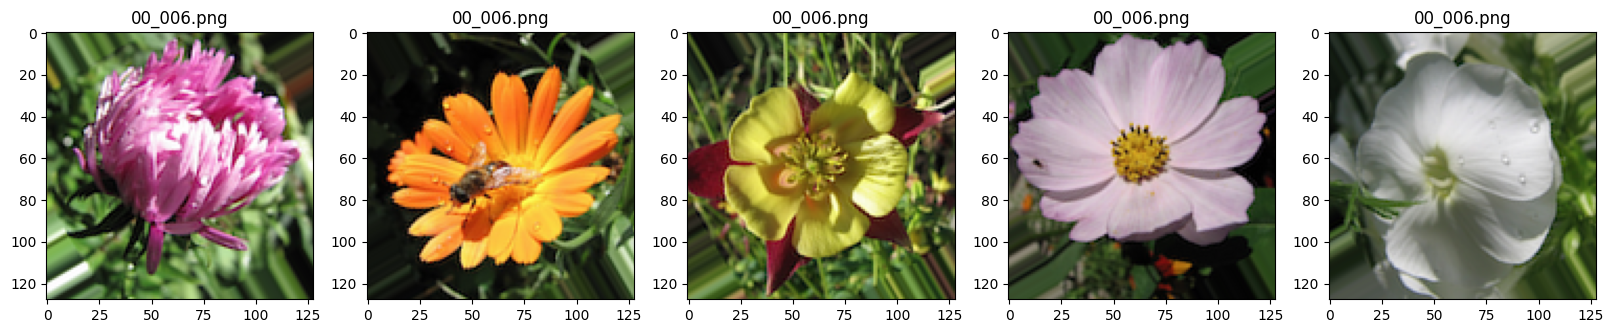

In [16]:
rotated_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  rotated_list.append(rotate_image_30_degrees(img))

for i, img in enumerate(rotated_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

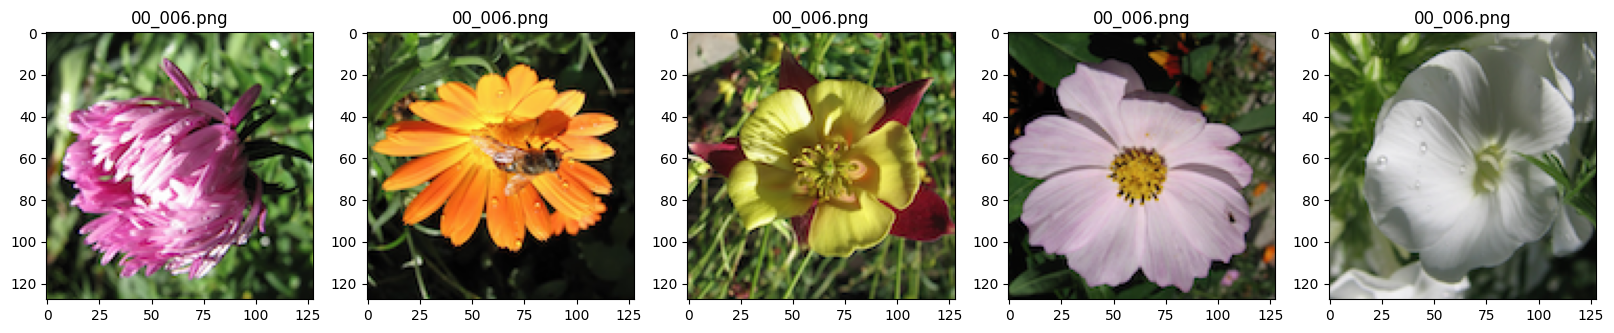

In [17]:
vertical_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  vertical_flip_list.append(vertical_flip(img))

for i, img in enumerate(vertical_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


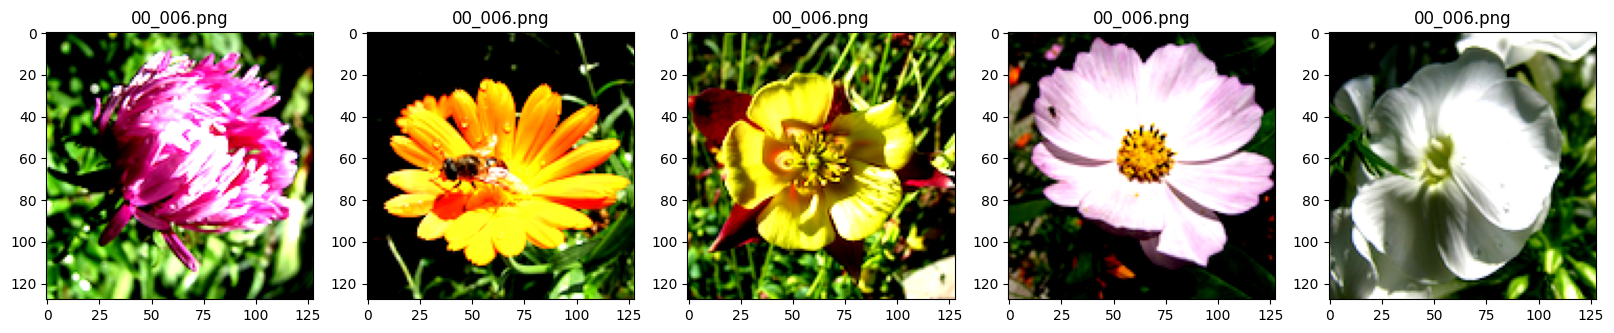

In [18]:
contrast_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  contrast_list.append(adjust_contrast(img))

for i, img in enumerate(contrast_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)